In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Model_Validation.csv')

Elec.shape

(1000, 2)

# Model_validation

1. 7 : 3 Array Split
 - random_state = 2045

2. 5차, 7차, 9차 모델
 - Test Error 비교

3. Split 및 Modeling 시각화

# (1) DataFarm Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
TR_Elec, TE_Elec = train_test_split(Elec, test_size = 0.3, random_state = 2045)

In [6]:
TR_Elec.shape, TE_Elec.shape

((700, 2), (300, 2))

In [7]:
TR_Elec.head()

,Inputs,Outputs
818,-2.671430,-0.849129
615,2.525234,1.042056
872,0.863997,0.374570
394,-0.955179,-0.540516
435,1.205815,0.729848


In [8]:
TE_Elec.head()

,Inputs,Outputs
665,-2.082845,-1.811198
200,0.852190,0.686995
439,-2.511907,0.108298
881,1.031356,0.040331
689,-1.877738,-1.187437


## (2) Array Split

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Elec[['Inputs']], Elec['Outputs'],
                                                    test_size = 0.3, random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 1), (700,), (300, 1), (300,))

In [14]:
X_train.head()

,Inputs
818,-2.671430
615,2.525234
872,0.863997
394,-0.955179
435,1.205815


In [15]:
y_train.head()

818   -0.849129
615    1.042056
872    0.374570
394   -0.540516
435    0.729848
Name: Outputs, dtype: float64

## (3) Distribution Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


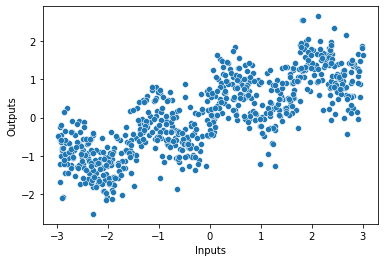

In [16]:
sns.scatterplot(TR_Elec['Inputs'], TR_Elec['Outputs'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


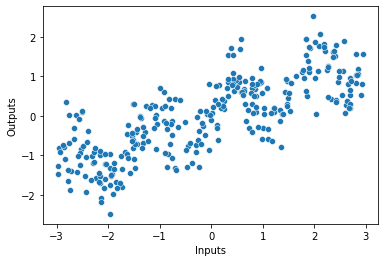

In [17]:
sns.scatterplot(TE_Elec['Inputs'], TE_Elec['Outputs'])
plt.show()

## 1) 5차 모델 Testing Error

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
from sklearn.metrics import mean_squared_error

In [33]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

0.3602980472002336

# 2) 7차 모델 Testing Error

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly = PolynomialFeatures(degree = 7, include_bias = False)
PX_7_TR = poly.fit_transform(X_train)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
Model_7 = LinearRegression()
Model_7.fit(PX_7_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
PX_7_TE = poly.fit_transform(X_test)

y_hat_7 = Model_7.predict(PX_7_TE)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
TE_Err_7 = mean_squared_error(y_test, y_hat_7)
TE_Err_7

0.35784993736519366

## 3) 9차 모델 Testing Error

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

0.2893114750133329

# 4) 3개 모델 Testing Error 비교

In [50]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  0.3933744691015871
5차 모델 :  0.3602980472002336
9차 모델 :  0.2893114750133329


# Visualization

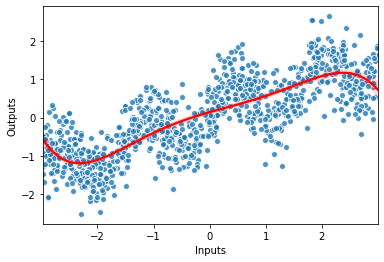

In [60]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = Elec,
            line_kws = {'color' : 'red'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)

plt.show()

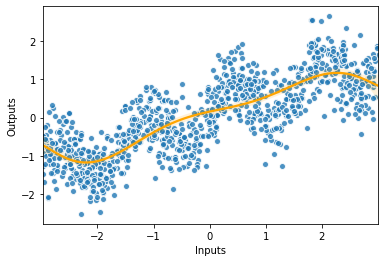

In [62]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = Elec,
            line_kws = {'color' : 'orange'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 7)

plt.show()

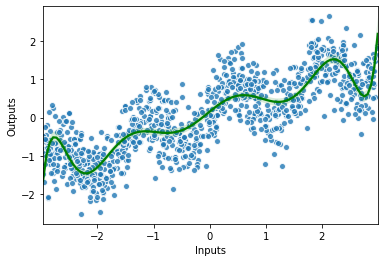

In [63]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = Elec,
            line_kws = {'color' : 'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 9)

plt.show()

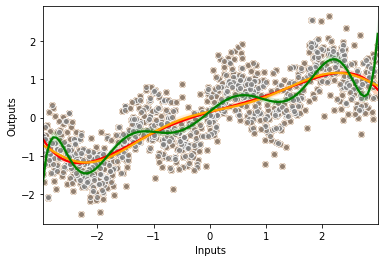

In [66]:
sns.regplot(x = 'Inputs', y = 'Outputs', data = Elec, line_kws = {'color' : 'red'}, order = 5)
sns.regplot(x = 'Inputs', y = 'Outputs', data = Elec, line_kws = {'color' : 'orange'}, order = 7)
sns.regplot(x = 'Inputs', y = 'Outputs', data = Elec, line_kws = {'color' : 'green'}, order = 9,
            scatter_kws = {'color' : 'gray', 'edgecolor' : 'white'})

# limit, ticks 설정 이해 필요

plt.show()